In [2]:
# import the needed libraries

import numpy as np
import pandas as pd
import sklearn

# configure matplotlib to show plots in the notebook itself
%matplotlib inline 

### Data

In this notebook, I used the [Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The data consists of patient records with a number of features, along with a binary label indicating if the patient has diabetes or not. Note that "all patients here are females at least 21 years old of Pima Indian heritage." Note that the `Outcome` variable records if a patient does or does not have diabetes.

In [3]:
df = pd.read_csv('diabetes.csv') #Loading the dataset

# Starting with a two-dimensional dataset to build intuitions
low_dim = df[['Glucose', 'BloodPressure', "Outcome"]]

<AxesSubplot:title={'center':'BloodPressure x Glucose'}, xlabel='Glucose', ylabel='BloodPressure'>

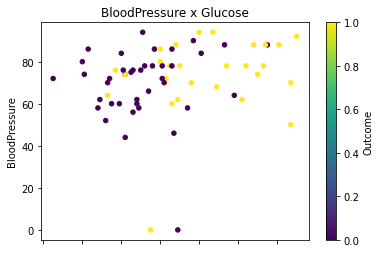

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Dividing the dataset into training and testing  
train = low_dim[0:700]
test = low_dim[700:]

test.plot.scatter(x='Glucose', y='BloodPressure', c="Outcome", colormap='viridis', title="BloodPressure x Glucose")

### Step 1 

Train a KNN classifier on the training set. Set `K`=2. Then test your classifier on the test set. How accurate is your classifier on the test set?

In [19]:
from sklearn.neighbors import KNeighborsClassifier


### Step 2

Implementing bagging. The basic procedure is 

1. Sample $N$ datapoints with replacement from the training set, where $N$ is the size of the training set.
2. Train a classifier on the $N$ datapoints
3. Make predictions for the test set
4. Average your predictions to make an aggregated prediction

In [6]:
def sample_with_replacement(training_set):
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
    '''
    Implement your code here
    Your function should return N instances from the training set, 
    selected at random with replacement
    '''
    return training_set.sample(n=len(training_set), replace = True)

def predict(knn_clf, test_set):
    '''Return a vector of predictions on the test set with your knn_clf'''
    return knn_clf.predict(X = test_set [['Glucose', 'BloodPressure']].to_numpy())

In [7]:
new_train = sample_with_replacement(train)

In [20]:
# implement bagging 

all_predictions = []

for i in range(1000):  
    
    # sample from the training set
    new_training_set = sample_with_replacement(training_set=train)
    
    knn = KNeighborsClassifier(n_neighbors = 2)
    
    knn.fit(X = new_training_set[["Glucose", "BloodPressure"]].to_numpy(), y = new_training_set['Outcome'].to_numpy())      
    
    preds = predict(knn_clf = knn, test_set = test)
    
    all_predictions.append(preds)



In [21]:
# aggregatiing predictions by average
bootstrap_pred = np.mean(np.stack(all_predictions), axis = 0) > 0.5
bootstrap_pred = bootstrap_pred.astype(int)

np.mean(bootstrap_pred == test['Outcome'].to_numpy())

0.6716417910447762

In [10]:
soft_pred = np.mean(np.stack(all_predictions), axis = 0)
test["soft_y"] = soft_pred

/var/folders/8y/h4057cz1537dtdkx2n6yq6980000gn/T/ipykernel_6899/6433802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["soft_y"] = soft_pred


In [11]:
# numpy extras 
Y = np.ones(4)
print(Y.shape)

yprime = np.ones((4,1))
print(yprime.shape)

(4,)
(4, 1)


In [12]:
Y.reshape(-1,1).shape

(4, 1)

In [13]:
yprime.ravel()

array([1., 1., 1., 1.])

In [14]:
xp = np.array([[]])

In [16]:
# Aggregate your predictions by averaging them
bootstrap_pred = np.mean(np.stack(all_predictions),axis=0) > .5
bootstrap_pred = bootstrap_pred.astype(int)
print(bootstrap_pred)

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [1]:
# Evaluate your predictions. How accurate are bootstrap_pred?

### Observation

Created a scatter plot showing blood pressure by glucose, using color to indicate through a 1-0 label for if the patient has diabetes. Then made a similar scatter plot showing "soft" predictions for each data point, based on the mean aggregated prediction. (Note: in ML "hard" predictions are categorical, and "soft" predictions are continuous and often represent probabilities.) According to the scatterplot below, it appears to me that the higher a patient's blood pressure, the more likely they are to have diabetes. In contrast, the lower the patient's glucose levels, the more likely the patient is to have diabetes. In conclusion, a patient with low glucose levels and high blood pressure has the highest chance of having diabetes.

<AxesSubplot:title={'center':'Glucose x Bloodpressure'}, xlabel='r', ylabel='BloodPressure'>

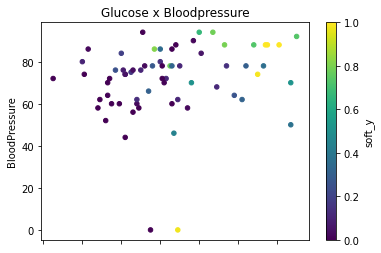

In [17]:
test.plot.scatter(x = 'Glucose', y = 'BloodPressure', c = "soft_y", 
                  xlabel = 'r', colormap = 'viridis', title = 'Glucose x Bloodpressure')


<AxesSubplot:title={'center':'Glucose x Bloodpressure'}, xlabel='r', ylabel='BloodPressure'>

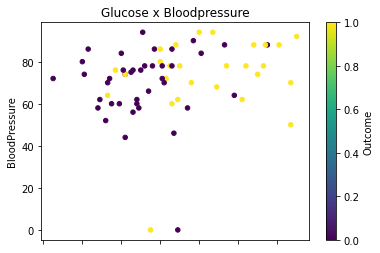

In [18]:
test.plot.scatter(x = 'Glucose', y = 'BloodPressure', c = 'Outcome', 
                  xlabel = 'r', colormap = 'viridis', title = 'Glucose x Bloodpressure')
